In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from CCDPApy.helper import output_path

pd.set_option('display.max_columns', 200)

In [18]:
# loading data
path = output_path('GT_output_2.xlsx')
df = pd.read_excel(path)
df.head(3)

Experiment Data Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0  Date (MM/DD/YY H:MM:SS AM/PM)  Cell Line         ID       Name   
1            2023-01-01 00:00:00       CL G     295008   Genetech   
2            2023-01-01 10:00:00       CL G     295008   Genetech   

            Unnamed: 4          Unnamed: 5                   Unnamed: 6  \
0  Initial Volume (mL)  Sample Volume (mL)  Volume Before Sampling (mL)   
1             12000000                   0                     12000000   
2             12000000                   0                     12000000   

                   Unnamed: 7             Unnamed: 8   Unnamed: 9 Unnamed: 10  \
0  Volume After Sampling (mL)  Feed Media Added (mL)  Feed Status      # Feed   
1                    12000000                      0            0           2   
2                    12000000                      0            0           2   

       Unnamed: 11 Unnamed: 12                                Unnamed: 13  \
0  Base Added (mL)  Osmolarity  Viable Cell Concentration (10^6 cells/mL)   
1                0  310.390602                                   0.707812   
2                0  294.969383                                   1.685265   

                               Unnamed: 14  \
0  Dead Cell Concentration (10^6 cells/mL)   
1                                 0.006987   
2                                  0.05182   

                                Unnamed: 15 Unnamed: 16 Unnamed: 17  \
0  Total Cell Concentration (10^6 cells/mL)  IgG (mg/L)        NH4+   
1                                    0.7148           0    3.071507   
2                                  1.737085           0    3.621828   

  Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  \
0         Na+       Titer     IntvPCV         PCV        pCO2       pHoff   
1   46.345103    1.059949           0    0.167421   93.000259    6.960743   
2   45.663156    1.059949     0.34761    0.258416   81.143342    7.002544   

  Unnamed: 24 Unnamed: 25    Unnamed: 26       Unnamed: 27   Unnamed: 28  \
0         pO2  air sparge  air sparge sp  air sparge total  backpressure   
1  101.258254   11.408122       5.688135       12734.85202      1.978115   
2   99.957496    53.19031      26.830021       26831.18445      1.981209   

  Unnamed: 29       Unnamed: 30            Unnamed: 31  Unnamed: 32  \
0  co2 sparge  co2 sparge total  do2 controller output  do2 primary   
1    3.245566       2785.682712               1.547035    29.921898   
2    3.325126       1858.298578               7.096126    28.151353   

     Unnamed: 33       Unnamed: 34    Unnamed: 35          Unnamed: 36  \
0  do2 secondary  flowrate overlay  oxygen sparge  oxygen sparge total   
1      29.161844        250.984953              0                    0   
2      28.057887        251.001728              0                    0   

            Unnamed: 37 Unnamed: 38             Unnamed: 39   Unnamed: 40  \
0  ph controller output  ph primary  pressure exhaust valve  sparge total   
1             46.003623    7.028866               70.414004     11.278256   
2             45.862719    7.030608               70.302097     53.020003   

   Unnamed: 41         Unnamed: 42       Unnamed: 43  Unnamed: 44  \
0  temperature  temperature jacket  weight load cell  Titer_range   
1    36.949926           37.437632        9452.84421    1.05-1.10   
2    37.042912           37.259285       10349.50443    1.05-1.10   

   Unnamed: 45    Unnamed: 46     Unnamed: 47     Unnamed: 48    Unnamed: 49  \
0  Titer_group  Viability (%)  Titer_category  Run Time (day)  Run Time (hr)   
1   Middle 60%      99.022465               0               0              0   
2   Middle 60%       97.01684               0               0             10   

  Concentration Before Feeding   Unnamed: 51 Concentration After Feeding  \
0                 Glucose (mM)  Lactate (mM)                Glucose (mM)   
1                    62.829937      5.794531                   62.829937   
2   

In [19]:
# Rename
rename_cols = ['Concentration After Feeding', 'Unnamed: 53', 'SP. Rate Polynomial Regression', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66']
new_names = ['Glucose_after_feed (mM)', 'Lactate_after_feed (mM)', 'qCell_poly (hr^-1)', 'qIgG_poly (mg/10^9 cells/hr)', 'qGlucose_poly (mmol/10^9 cells/hr)', 'qLactate_poly (mmol/10^9 cells/hr)']
df.loc[0, rename_cols] = new_names
df.head(3)

Experiment Data Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0  Date (MM/DD/YY H:MM:SS AM/PM)  Cell Line         ID       Name   
1            2023-01-01 00:00:00       CL G     295008   Genetech   
2            2023-01-01 10:00:00       CL G     295008   Genetech   

            Unnamed: 4          Unnamed: 5                   Unnamed: 6  \
0  Initial Volume (mL)  Sample Volume (mL)  Volume Before Sampling (mL)   
1             12000000                   0                     12000000   
2             12000000                   0                     12000000   

                   Unnamed: 7             Unnamed: 8   Unnamed: 9 Unnamed: 10  \
0  Volume After Sampling (mL)  Feed Media Added (mL)  Feed Status      # Feed   
1                    12000000                      0            0           2   
2                    12000000                      0            0           2   

       Unnamed: 11 Unnamed: 12                                Unnamed: 13  \
0  Base Added (mL)  Osmolarity  Viable Cell Concentration (10^6 cells/mL)   
1                0  310.390602                                   0.707812   
2                0  294.969383                                   1.685265   

                               Unnamed: 14  \
0  Dead Cell Concentration (10^6 cells/mL)   
1                                 0.006987   
2                                  0.05182   

                                Unnamed: 15 Unnamed: 16 Unnamed: 17  \
0  Total Cell Concentration (10^6 cells/mL)  IgG (mg/L)        NH4+   
1                                    0.7148           0    3.071507   
2                                  1.737085           0    3.621828   

  Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  \
0         Na+       Titer     IntvPCV         PCV        pCO2       pHoff   
1   46.345103    1.059949           0    0.167421   93.000259    6.960743   
2   45.663156    1.059949     0.34761    0.258416   81.143342    7.002544   

  Unnamed: 24 Unnamed: 25    Unnamed: 26       Unnamed: 27   Unnamed: 28  \
0         pO2  air sparge  air sparge sp  air sparge total  backpressure   
1  101.258254   11.408122       5.688135       12734.85202      1.978115   
2   99.957496    53.19031      26.830021       26831.18445      1.981209   

  Unnamed: 29       Unnamed: 30            Unnamed: 31  Unnamed: 32  \
0  co2 sparge  co2 sparge total  do2 controller output  do2 primary   
1    3.245566       2785.682712               1.547035    29.921898   
2    3.325126       1858.298578               7.096126    28.151353   

     Unnamed: 33       Unnamed: 34    Unnamed: 35          Unnamed: 36  \
0  do2 secondary  flowrate overlay  oxygen sparge  oxygen sparge total   
1      29.161844        250.984953              0                    0   
2      28.057887        251.001728              0                    0   

            Unnamed: 37 Unnamed: 38             Unnamed: 39   Unnamed: 40  \
0  ph controller output  ph primary  pressure exhaust valve  sparge total   
1             46.003623    7.028866               70.414004     11.278256   
2             45.862719    7.030608               70.302097     53.020003   

   Unnamed: 41         Unnamed: 42       Unnamed: 43  Unnamed: 44  \
0  temperature  temperature jacket  weight load cell  Titer_range   
1    36.949926           37.437632        9452.84421    1.05-1.10   
2    37.042912           37.259285       10349.50443    1.05-1.10   

   Unnamed: 45    Unnamed: 46     Unnamed: 47     Unnamed: 48    Unnamed: 49  \
0  Titer_group  Viability (%)  Titer_category  Run Time (day)  Run Time (hr)   
1   Middle 60%      99.022465               0               0              0   
2   Middle 60%       97.01684               0               0             10   

  Concentration Before Feeding   Unnamed: 51 Concentration After Feeding  \
0                 Glucose (mM)  Lactate (mM)     Glucose_after_feed (mM)   
1                    62.829937      5.794531                   62.829937   
2   

In [20]:
# Get the first row and set it as column names
df.columns = df.iloc[0]
# Drop the first row after setting it as column names
df = df[1:]
df.head(3)

0 Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

0 Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

0 Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed  \
1                   12000000                     0           0      2   
2                   12000000                     0           0      2   
3                   12000000                     0           0      2   

0 Base Added (mL)  Osmolarity Viable Cell Concentration (10^6 cells/mL)  \
1               0  310.390602                                  0.707812   
2               0  294.969383                                  1.685265   
3               0  297.612555                                  1.544325   

0 Dead Cell Concentration (10^6 cells/mL)  \
1                                0.006987   
2                                 0.05182   
3                                0.047093   

0 Total Cell Concentration (10^6 cells/mL) IgG (mg/L)      NH4+        Na+  \
1                                   0.7148          0  3.071507  46.345103   
2                                 1.737085          0  3.621828  45.663156   
3                                 1.591418          0  4.172149  44.981209   

0     Titer   IntvPCV       PCV       pCO2     pHoff         pO2 air sparge  \
1  1.059949         0  0.167421  93.000259  6.960743  101.258254  11.408122   
2  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   53.19031   
3  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738  71.584015   

0 air sparge sp air sparge total backpressure co2 sparge co2 sparge total  \
1      5.688135      12734.85202     1.978115   3.245566      2785.682712   
2     26.830021      26831.18445     1.981209   3.325126      1858.298578   
3       35.7517      64305.34848     1.972489   3.253458      3794.494966   

0 do2 controller output do2 primary do2 secondary flowrate overlay  \
1              1.547035   29.921898     29.161844       250.984953   
2              7.096126   28.151353     28.057887       251.001728   
3              9.549251   30.234508     30.208355       250.950363   

0 oxygen sparge oxygen sparge total ph controller output ph primary  \
1             0                   0            46.003623   7.028866   
2             0                   0            45.862719   7.030608   
3             0                   0            45.911384   7.028387   

0 pressure exhaust valve sparge total temperature temperature jacket  \
1              70.414004    11.278256   36.949926          37.437632   
2              70.302097    53.020003   37.042912          37.259285   
3              71.111027    71.403806   36.996902           37.37155   

0 weight load cell Titer_range Titer_group Viability (%) Titer_category  \
1       9452.84421   1.05-1.10  Middle 60%     99.022465              0   
2      10349.50443   1.05-1.10  Middle 60%      97.01684              0   
3      10343.89697   1.05-1.10  Middle 60%     97.040803              0   

0 Run Time (day) Run Time (hr) Glucose (mM) Lactate (mM)  \
1              0             0    62.829937     5.794531   
2              0            10    62.126848      9.07807   
3              0            20    59.375606    13.064794   

0 Glucose_after_feed (mM) Lactate_after_feed (mM) Cell (10^6 cells)  \
1               62.829937                5.794531                 0   
2               62.126848                 9.07807      11729439.144   
3               59.375606               13.064794      10038154.356   

0 IVCC (10^6 cells hr/mL) IgG (mg) Glucose (mmol) Lactate (mmo

In [21]:
# Rename Columns
df = df.rename(columns={
    'Base Added (mL)': 'base',
    'Osmolarity': 'osmo',
    'Viable Cell Concentration (10^6 cells/mL)': 'vcd',
    'Dead Cell Concentration (10^6 cells/mL)': 'dcd',
    'Total Cell Concentration (10^6 cells/mL)': 'tcd',
    'Viability (%)': 'viab',
    'Glucose (mM)': 'glc',
    'Lactate (mM)': 'lac',
    'Glucose_after_feed (mM)': 'glc_after',
    'Lactate_after_feed (mM)': 'lac_after',
    'Cell (10^6 cells)': 'ccell',
    'IVCC (10^6 cells hr/mL)': 'ivcc',
    'Glucose (mmol)': 'cglc',
    'Lactate (mmol)': 'clac',
    'Cell (hr^-1)': 'mu',
    'Glucose (mmol/10^9 cells/hr)': 'qglc',
    'Lactate (mmol/10^9 cells/hr)': 'qlac',
    'qCell_poly (hr^-1)': 'mu_poly', 
    'qGlucose_poly (mmol/10^9 cells/hr)': 'qglc_poly',
    'qLactate_poly (mmol/10^9 cells/hr)': 'qlac_poly',
})
df.head(3)

0 Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

0 Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

0 Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed base  \
1                   12000000                     0           0      2    0   
2                   12000000                     0           0      2    0   
3                   12000000                     0           0      2    0   

0        osmo       vcd       dcd       tcd IgG (mg/L)      NH4+        Na+  \
1  310.390602  0.707812  0.006987    0.7148          0  3.071507  46.345103   
2  294.969383  1.685265   0.05182  1.737085          0  3.621828  45.663156   
3  297.612555  1.544325  0.047093  1.591418          0  4.172149  44.981209   

0     Titer   IntvPCV       PCV       pCO2     pHoff         pO2 air sparge  \
1  1.059949         0  0.167421  93.000259  6.960743  101.258254  11.408122   
2  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   53.19031   
3  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738  71.584015   

0 air sparge sp air sparge total backpressure co2 sparge co2 sparge total  \
1      5.688135      12734.85202     1.978115   3.245566      2785.682712   
2     26.830021      26831.18445     1.981209   3.325126      1858.298578   
3       35.7517      64305.34848     1.972489   3.253458      3794.494966   

0 do2 controller output do2 primary do2 secondary flowrate overlay  \
1              1.547035   29.921898     29.161844       250.984953   
2              7.096126   28.151353     28.057887       251.001728   
3              9.549251   30.234508     30.208355       250.950363   

0 oxygen sparge oxygen sparge total ph controller output ph primary  \
1             0                   0            46.003623   7.028866   
2             0                   0            45.862719   7.030608   
3             0                   0            45.911384   7.028387   

0 pressure exhaust valve sparge total temperature temperature jacket  \
1              70.414004    11.278256   36.949926          37.437632   
2              70.302097    53.020003   37.042912          37.259285   
3              71.111027    71.403806   36.996902           37.37155   

0 weight load cell Titer_range Titer_group       viab Titer_category  \
1       9452.84421   1.05-1.10  Middle 60%  99.022465              0   
2      10349.50443   1.05-1.10  Middle 60%   97.01684              0   
3      10343.89697   1.05-1.10  Middle 60%  97.040803              0   

0 Run Time (day) Run Time (hr)        glc        lac  glc_after  lac_after  \
1              0             0  62.829937   5.794531  62.829937   5.794531   
2              0            10  62.126848    9.07807  62.126848    9.07807   
3              0            20  59.375606  13.064794  59.375606  13.064794   

0         ccell       ivcc IgG (mg)          cglc          clac        mu  \
1             0          0        0             0             0       NaN   
2  11729439.144  11.965388        0   8437.068541   39402.46825   0.08169   
3  10038154.356   28.11334        0  41451.971625  87243.157993 -0.008728   

0 IgG (mg/10^9 cells/hr)      qglc      qlac   mu_poly  \
1                    NaN       NaN       NaN       NaN   
2                      0   0.05876   0.27442  0.064368   
3                      0  0.170377  0.246887   0.04399   

0 qIgG_poly (mg/10^9 cells/hr) qglc_poly qlac_poly  
1                            0  0.127912   0.36173  
2                            0  0.080913  0.138233  
3                            0   0.11614  0.

In [23]:
df.dtypes

0
Date (MM/DD/YY H:MM:SS AM/PM)    object
Cell Line                        object
ID                               object
Name                             object
Initial Volume (mL)              object
                                  ...  
qlac                             object
mu_poly                          object
qIgG_poly (mg/10^9 cells/hr)     object
qglc_poly                        object
qlac_poly                        object
Length: 67, dtype: object

In [22]:
# rename species cncentration before and after feed
# rename species specific rate with regressions
'''old_columns = np.array(df.columns)
columns_rename = ['Glucose (mM)', 'Lactate (mM)',
                  #'mu', 'qGlucose', 'qLactate'
                  ]
indices = [i for i, col in enumerate(old_columns) if col in columns_rename]

new_columns = old_columns.copy()
new_columns[indices] = ['glc', 'lac', 
                        'glc_after', 'lac_after',
                        #'mu', 'qglc', 'qlac',
                        #'Poly mu', 'Poly qGlucose', 'Poly qLactate'
                        ]

df.columns = new_columns
df.head(3)'''

"old_columns = np.array(df.columns)\ncolumns_rename = ['Glucose (mM)', 'Lactate (mM)',\n                  #'mu', 'qGlucose', 'qLactate'\n                  ]\nindices = [i for i, col in enumerate(old_columns) if col in columns_rename]\n\nnew_columns = old_columns.copy()\nnew_columns[indices] = ['glc', 'lac', \n                        'glc_after', 'lac_after',\n                        #'mu', 'qglc', 'qlac',\n                        #'Poly mu', 'Poly qGlucose', 'Poly qLactate'\n                        ]\n\ndf.columns = new_columns\ndf.head(3)"

In [7]:
# Interpolation the first value in polynomial mu
'''for run_id, grouped_df in df.groupby(by='ID'):
    y = grouped_df['Poly mu'].astype(np.float64).interpolate(method='spline', limit_direction='backward', order=3)
    ind = df['ID']==run_id
    df.loc[ind, 'Poly mu'] = y

df.head()'''

"for run_id, grouped_df in df.groupby(by='ID'):\n    y = grouped_df['Poly mu'].astype(np.float64).interpolate(method='spline', limit_direction='backward', order=3)\n    ind = df['ID']==run_id\n    df.loc[ind, 'Poly mu'] = y\n\ndf.head()"

In [8]:
df.columns

Index(['Date (MM/DD/YY H:MM:SS AM/PM)', 'Cell Line', 'ID', 'Name',
       'Initial Volume (mL)', 'Sample Volume (mL)',
       'Volume Before Sampling (mL)', 'Volume After Sampling (mL)',
       'Feed Media Added (mL)', 'Feed Status', '# Feed', 'base', 'osmo', 'vcd',
       'dcd', 'tcd', 'IgG (mg/L)', 'NH4+', 'Na+', 'Titer', 'IntvPCV', 'PCV',
       'pCO2', 'pHoff', 'pO2', 'air sparge', 'air sparge sp',
       'air sparge total', 'backpressure', 'co2 sparge', 'co2 sparge total',
       'do2 controller output', 'do2 primary', 'do2 secondary',
       'flowrate overlay', 'oxygen sparge', 'oxygen sparge total',
       'ph controller output', 'ph primary', 'pressure exhaust valve',
       'sparge total', 'temperature', 'temperature jacket', 'weight load cell',
       'Titer_range', 'Titer_group', 'viab', 'Titer_category',
       'Run Time (day)', 'Run Time (hr)', 'glc', 'lac', 'glc_after',
       'lac_after', 'ccell', 'ivcc', 'IgG (mg)', 'cglc', 'clac', 'mu',
       'IgG (mg/10^9 cells/hr)',

In [9]:
def make_plot_df(data):
    '''create dataframe for plotting'''
    columns_drop = [
        'Date (MM/DD/YY H:MM:SS AM/PM)', 
        'Cell Line', 
        'Name',
        'Initial Volume (mL)', 
        'Sample Volume (mL)', 
        'Volume Before Sampling (mL)', 
        'Volume After Sampling (mL)',
        'Feed Media Added (mL)', 
        'Feed Status', 
        '# Feed', 
        'IgG (mg/L)', 
        'IgG (mg)', 
        'IgG (mg/10^9 cells/hr)',
        'qIgG_poly (mg/10^9 cells/hr)'
    ]
    df = data.drop(columns=columns_drop, axis=1)
    id_cols = [
        'ID', 'Titer', 'Titer_range', 'Titer_group', 'Titer_category',
        'Run Time (day)', 'Run Time (hr)', 'glc_after', 'lac_after',
    ]
    plot_df = df.melt(id_vars=id_cols, var_name='Parameter', value_name="Value")
    return plot_df

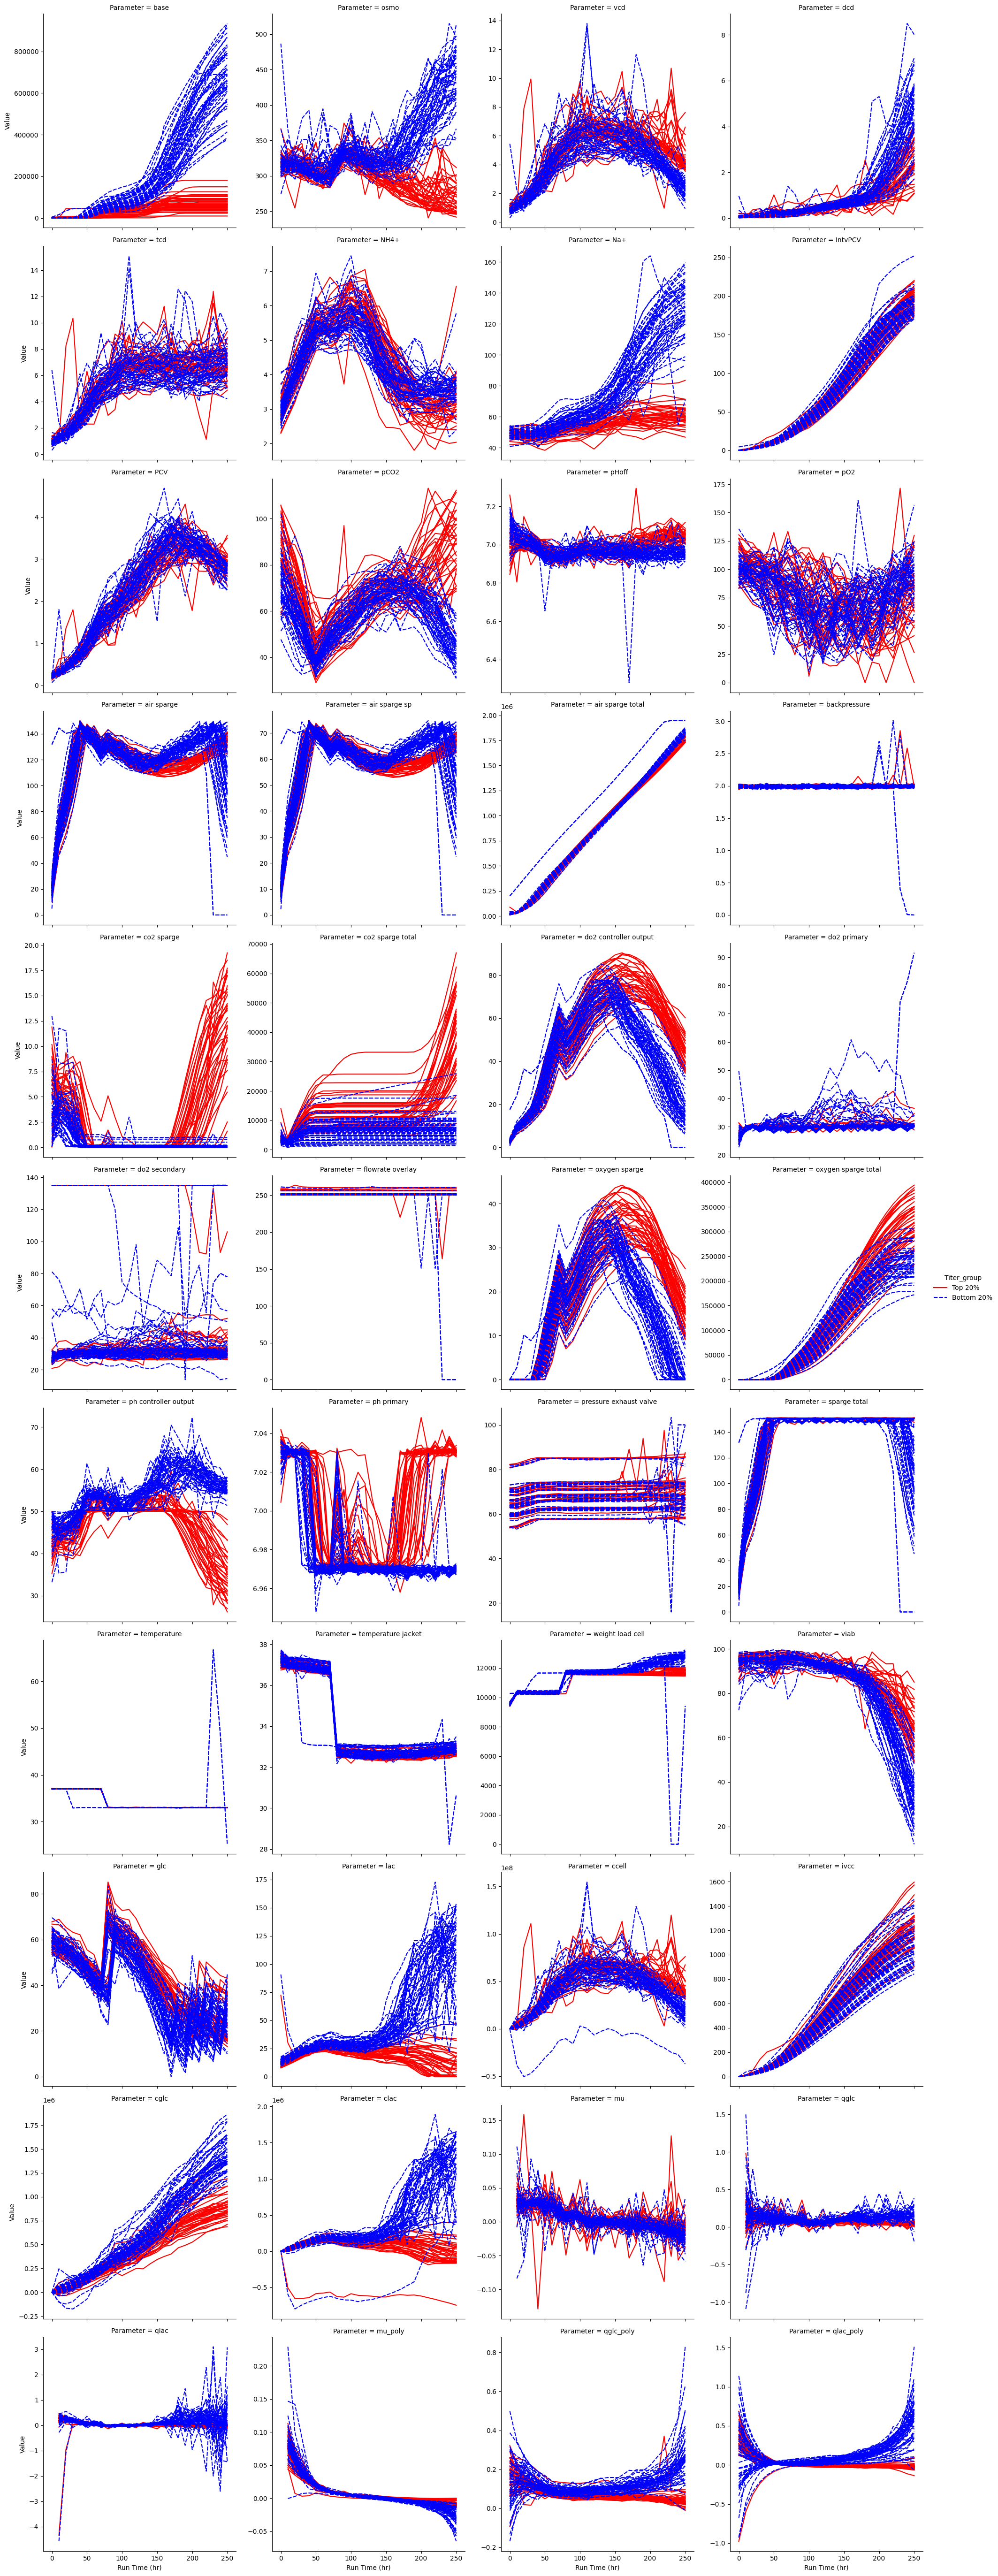

In [10]:
# Plotting Profiles
plot_df = make_plot_df(data=df)
colors = ["r", "b"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']!='Middle 60%'], x=x, y=y, kind='line',
            estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            col='Parameter',
            col_wrap=4,
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()

In [11]:
# saving
path = output_path('genetech_raw_2.csv')
df.to_csv(path, index=False)

# Removing outliers

In [12]:
# Find ID
# df[(df['Run Time (hr)']==0) & (df['Lactate BF'] > 60)]

In [13]:
# Find ID
# df[(df['weight load cell']<2000)]

In [14]:
# Remove 
'''id_remove = ['755846', '836570', '318938', '322405']

df = df[(df['ID']!='755846') & (df['ID']!='836570') & (df['ID']!='318938') & (df['ID']!='322405')]

df['ID'].unique().size'''

"id_remove = ['755846', '836570', '318938', '322405']\n\ndf = df[(df['ID']!='755846') & (df['ID']!='836570') & (df['ID']!='318938') & (df['ID']!='322405')]\n\ndf['ID'].unique().size"

In [15]:
# Plotting Profiles
'''plot_df = make_plot_df(data=df)

colors = ["r", "b"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']!='Middle 60%'], x=x, y=y, kind='line',
            estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            col='Parameter',
            col_wrap=4,
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()'''

'plot_df = make_plot_df(data=df)\n\ncolors = ["r", "b"]\nsns.set_palette(colors)\nx = \'Run Time (hr)\'\ny = \'Value\'\nsns.relplot(data=plot_df[plot_df[\'Titer_group\']!=\'Middle 60%\'], x=x, y=y, kind=\'line\',\n            estimator=None, units=\'ID\',\n            hue=\'Titer_group\', hue_order=[\'Top 20%\', \'Bottom 20%\'],\n            style=\'Titer_group\', style_order=[\'Top 20%\', \'Bottom 20%\'],\n            col=\'Parameter\',\n            col_wrap=4,\n            facet_kws={\'sharey\': False, \'sharex\': True},)\nplt.show()'

# Smoothing

In [16]:
df.head(3)

0 Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

0 Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

0 Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed base  \
1                   12000000                     0           0      2    0   
2                   12000000                     0           0      2    0   
3                   12000000                     0           0      2    0   

0        osmo       vcd       dcd       tcd IgG (mg/L)      NH4+        Na+  \
1  310.390602  0.707812  0.006987    0.7148          0  3.071507  46.345103   
2  294.969383  1.685265   0.05182  1.737085          0  3.621828  45.663156   
3  297.612555  1.544325  0.047093  1.591418          0  4.172149  44.981209   

0     Titer   IntvPCV       PCV       pCO2     pHoff         pO2 air sparge  \
1  1.059949         0  0.167421  93.000259  6.960743  101.258254  11.408122   
2  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   53.19031   
3  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738  71.584015   

0 air sparge sp air sparge total backpressure co2 sparge co2 sparge total  \
1      5.688135      12734.85202     1.978115   3.245566      2785.682712   
2     26.830021      26831.18445     1.981209   3.325126      1858.298578   
3       35.7517      64305.34848     1.972489   3.253458      3794.494966   

0 do2 controller output do2 primary do2 secondary flowrate overlay  \
1              1.547035   29.921898     29.161844       250.984953   
2              7.096126   28.151353     28.057887       251.001728   
3              9.549251   30.234508     30.208355       250.950363   

0 oxygen sparge oxygen sparge total ph controller output ph primary  \
1             0                   0            46.003623   7.028866   
2             0                   0            45.862719   7.030608   
3             0                   0            45.911384   7.028387   

0 pressure exhaust valve sparge total temperature temperature jacket  \
1              70.414004    11.278256   36.949926          37.437632   
2              70.302097    53.020003   37.042912          37.259285   
3              71.111027    71.403806   36.996902           37.37155   

0 weight load cell Titer_range Titer_group       viab Titer_category  \
1       9452.84421   1.05-1.10  Middle 60%  99.022465              0   
2      10349.50443   1.05-1.10  Middle 60%   97.01684              0   
3      10343.89697   1.05-1.10  Middle 60%  97.040803              0   

0 Run Time (day) Run Time (hr)        glc        lac  glc_after  lac_after  \
1              0             0  62.829937   5.794531  62.829937   5.794531   
2              0            10  62.126848    9.07807  62.126848    9.07807   
3              0            20  59.375606  13.064794  59.375606  13.064794   

0         ccell       ivcc IgG (mg)          cglc          clac        mu  \
1             0          0        0             0             0       NaN   
2  11729439.144  11.965388        0   8437.068541   39402.46825   0.08169   
3  10038154.356   28.11334        0  41451.971625  87243.157993 -0.008728   

0 IgG (mg/10^9 cells/hr)      qglc      qlac   mu_poly  \
1                    NaN       NaN       NaN       NaN   
2                      0   0.05876   0.27442  0.064368   
3                      0  0.170377  0.246887   0.04399   

0 qIgG_poly (mg/10^9 cells/hr) qglc_poly qlac_poly  
1                            0  0.127912   0.36173  
2                            0  0.080913  0.138233  
3                            0   0.11614  0.

In [17]:
parameters_smooth = [
    'ID', 'Run Time (hr)', 'Titer_group',
    'Osmolarity', 'VCD', 'NH4+', 'Na+', 'Lactate BF', 'Cum Glucose']

temp_df = df[parameters_smooth].copy()
temp_df['Data'] = 'Raw'
temp_df.head(3)

KeyError: "['Osmolarity', 'VCD', 'Lactate BF', 'Cum Glucose'] not in index"

In [ ]:
from scipy import signal

def smoothing(x):
    # 
    window_length = 20
    poly_order = 3
    x_smoothed = signal.savgol_filter(x, window_length=window_length, polyorder=poly_order, mode="nearest")
    return x_smoothed

In [ ]:
# Applying smoothing function
'''df_list = []
cols = [
    'Osmolarity', 'VCD', 'NH4+', 'Na+', 'Lactate BF', 'Cum Glucose']

for run_id, group_df in temp_df.groupby(by='ID'):
    temp = group_df[cols]
    group_df.loc[:, cols] = temp.apply(smoothing)
    df_list.append(group_df)

smoothed_df = pd.concat(df_list, axis=0)
smoothed_df['Data'] = 'Smoothed'

smooth_df = pd.concat([temp_df, smoothed_df], axis=0)
smooth_df.head()'''

"df_list = []\ncols = [\n    'Osmolarity', 'VCD', 'NH4+', 'Na+', 'Lactate BF', 'Cum Glucose']\n\nfor run_id, group_df in temp_df.groupby(by='ID'):\n    temp = group_df[cols]\n    group_df.loc[:, cols] = temp.apply(smoothing)\n    df_list.append(group_df)\n\nsmoothed_df = pd.concat(df_list, axis=0)\nsmoothed_df['Data'] = 'Smoothed'\n\nsmooth_df = pd.concat([temp_df, smoothed_df], axis=0)\nsmooth_df.head()"

In [ ]:
'''id_cols = ['ID', 'Titer_group', 'Run Time (hr)', 'Data']
plot_df = smooth_df.melt(id_vars=id_cols, var_name='Parameter', value_name="Value")
plot_df.head()

# Plotting Profiles
colors = ["r", "b"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']!='Middle 60%'], 
            x=x, y=y, kind='line',
            estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            col='Data',
            row='Parameter',
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()'''

'id_cols = [\'ID\', \'Titer_group\', \'Run Time (hr)\', \'Data\']\nplot_df = smooth_df.melt(id_vars=id_cols, var_name=\'Parameter\', value_name="Value")\nplot_df.head()\n\n# Plotting Profiles\ncolors = ["r", "b"]\nsns.set_palette(colors)\nx = \'Run Time (hr)\'\ny = \'Value\'\nsns.relplot(data=plot_df[plot_df[\'Titer_group\']!=\'Middle 60%\'], \n            x=x, y=y, kind=\'line\',\n            estimator=None, units=\'ID\',\n            hue=\'Titer_group\', hue_order=[\'Top 20%\', \'Bottom 20%\'],\n            style=\'Titer_group\', style_order=[\'Top 20%\', \'Bottom 20%\'],\n            col=\'Data\',\n            row=\'Parameter\',\n            facet_kws={\'sharey\': False, \'sharex\': True},)\nplt.show()'

In [ ]:
# Plotting Profiles
'''colors = ["gray"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']=='Middle 60%'], 
            x=x, y=y, kind='line',
            estimator=None, units='ID',
            col='Data',
            row='Parameter',
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()'''

'colors = ["gray"]\nsns.set_palette(colors)\nx = \'Run Time (hr)\'\ny = \'Value\'\nsns.relplot(data=plot_df[plot_df[\'Titer_group\']==\'Middle 60%\'], \n            x=x, y=y, kind=\'line\',\n            estimator=None, units=\'ID\',\n            col=\'Data\',\n            row=\'Parameter\',\n            facet_kws={\'sharey\': False, \'sharex\': True},)\nplt.show()'

# Save as csv

In [ ]:
df.head(3)

Date (MM/DD/YY H:MM:SS AM/PM) Cell Line      ID      Name  \
1           2023-01-01 00:00:00      CL G  295008  Genetech   
2           2023-01-01 10:00:00      CL G  295008  Genetech   
3           2023-01-01 20:00:00      CL G  295008  Genetech   

  Initial Volume (mL) Sample Volume (mL) Volume Before Sampling (mL)  \
1            12000000                  0                    12000000   
2            12000000                  0                    12000000   
3            12000000                  0                    12000000   

  Volume After Sampling (mL) Feed Media Added (mL) Feed Status # Feed base  \
1                   12000000                     0           0      2    0   
2                   12000000                     0           0      2    0   
3                   12000000                     0           0      2    0   

         osmo       vcd       dcd       tcd IgG (mg/L)      NH4+        Na+  \
1  310.390602  0.707812  0.006987    0.7148          0  3.071507  46.345103   
2  294.969383  1.685265   0.05182  1.737085          0  3.621828  45.663156   
3  297.612555  1.544325  0.047093  1.591418          0  4.172149  44.981209   

      Titer   IntvPCV       PCV       pCO2     pHoff         pO2 air sparge  \
1  1.059949         0  0.167421  93.000259  6.960743  101.258254  11.408122   
2  1.059949   0.34761  0.258416  81.143342  7.002544   99.957496   53.19031   
3  1.059949  1.803381  0.364611  69.286425  7.014704   98.656738  71.584015   

  air sparge sp air sparge total backpressure co2 sparge co2 sparge total  \
1      5.688135      12734.85202     1.978115   3.245566      2785.682712   
2     26.830021      26831.18445     1.981209   3.325126      1858.298578   
3       35.7517      64305.34848     1.972489   3.253458      3794.494966   

  do2 controller output do2 primary do2 secondary flowrate overlay  \
1              1.547035   29.921898     29.161844       250.984953   
2              7.096126   28.151353     28.057887       251.001728   
3              9.549251   30.234508     30.208355       250.950363   

  oxygen sparge oxygen sparge total ph controller output ph primary  \
1             0                   0            46.003623   7.028866   
2             0                   0            45.862719   7.030608   
3             0                   0            45.911384   7.028387   

  pressure exhaust valve sparge total temperature temperature jacket  \
1              70.414004    11.278256   36.949926          37.437632   
2              70.302097    53.020003   37.042912          37.259285   
3              71.111027    71.403806   36.996902           37.37155   

  weight load cell Titer_range Titer_group       viab Titer_category  \
1       9452.84421   1.05-1.10  Middle 60%  99.022465              0   
2      10349.50443   1.05-1.10  Middle 60%   97.01684              0   
3      10343.89697   1.05-1.10  Middle 60%  97.040803              0   

  Run Time (day) Run Time (hr)        glc        lac  glc_after  lac_after  \
1              0             0  62.829937   5.794531  62.829937   5.794531   
2              0            10  62.126848    9.07807  62.126848    9.07807   
3              0            20  59.375606  13.064794  59.375606  13.064794   

          ccell       ivcc IgG (mg)          cglc          clac        mu  \
1             0          0        0             0             0       NaN   
2  11729439.144  11.965388        0   8437.068541   39402.46825   0.08169   
3  10038154.356   28.11334        0  41451.971625  87243.157993 -0.008728   

  IgG (mg/10^9 cells/hr)      qglc      qlac  
1                    NaN       NaN       NaN  
2                      0   0.05876   0.27442  
3                      0  0.170377  0.246887

In [ ]:
# saving
path = output_path('genetech_raw_2.csv')
df.to_csv(path, index=False)